# Saarthak Marathe | ME17B162
# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [1]:
# Code here
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
y = df['Outcome']
x = df
del x['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
x1, x_test, y1, y_test = train_test_split(x, y, test_size=0.10)
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.111)

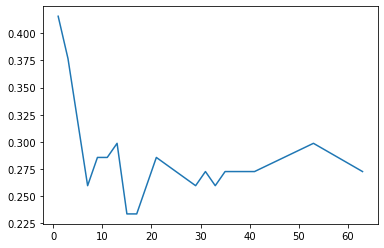

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
k = [1,3,7,9,11,13,15,17,21,25,29,31,33,35,41,53,63]
error = []
for i in range(len(k)):
    classifier = KNeighborsClassifier(n_neighbors=k[i])
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    error.append(np.mean(y_pred != y_val))
plt.plot(k, error)

In [5]:
for i in range(len(k)):
    print('k: %f, Error: %f' %(k[i], error[i]))

k: 1.000000, Error: 0.467532
k: 3.000000, Error: 0.376623
k: 7.000000, Error: 0.259740
k: 9.000000, Error: 0.259740
k: 11.000000, Error: 0.220779
k: 13.000000, Error: 0.220779
k: 15.000000, Error: 0.246753
k: 17.000000, Error: 0.207792
k: 21.000000, Error: 0.207792
k: 25.000000, Error: 0.259740
k: 29.000000, Error: 0.220779
k: 31.000000, Error: 0.194805
k: 33.000000, Error: 0.194805
k: 35.000000, Error: 0.207792
k: 41.000000, Error: 0.207792
k: 53.000000, Error: 0.246753
k: 63.000000, Error: 0.233766


k = 17,41,53,63 give the same accuracy for the validation set. Selecting k=17 as it will tend to give a more generalised solution than others and avoid the tendency to overfit (which other two might do)

In [68]:
#selecting k=17 as the no of clusters

#for test dataset
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
error = (np.mean(y_pred != y_test))
print('Accuracy for the test data with k=', 17, ':', 1-error)

Accuracy for the test data with k= 17 : 0.8181818181818181


## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



In [69]:
# Code here
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [82]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20)

In [89]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score

gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test)
#accuracygaus = gnb.score(x_test, y_test) 

bnb = BernoulliNB().fit(x_train, y_train) 
bnb_predictions = bnb.predict(x_test)
#accuracyber = bnb.score(x_test, y_test) 

cm_gaus = confusion_matrix(y_test, gnb_predictions) 
cm_ber = confusion_matrix(y_test, bnb_predictions) 

f1_gaus = f1_score(y_test, gnb_predictions, average = None)
f1_ber = f1_score(y_test, bnb_predictions, average = None)

print('For Gaussian NB:')
print('Confusion Matrix:\n', cm_gaus)
print('F1 score =',f1_gaus)

print('\nFor Bernoulli NB:')
print('Confusion Matrix:\n', cm_ber)
print('F1 score =',f1_ber)

For Gaussian NB:
Confusion Matrix:
 [[30  0  0  0  0  1  0  0  0  0]
 [ 0 28  0  0  0  0  1  2  2  1]
 [ 0  3 24  1  0  1  0  0  8  0]
 [ 0  0  0 28  0  4  0  2  6  0]
 [ 0  0  0  0 32  0  1  2  0  0]
 [ 0  0  0  0  0 31  0  1  1  0]
 [ 0  0  0  0  0  1 29  0  0  0]
 [ 0  0  0  0  1  0  0 43  0  1]
 [ 0  2  0  0  0  2  0  4 31  0]
 [ 0  1  0  2  1  1  0  5  4 22]]
F1 score = [0.98360656 0.82352941 0.78688525 0.78873239 0.92753623 0.83783784
 0.95081967 0.82692308 0.68131868 0.73333333]

For Bernoulli NB:
Confusion Matrix:
 [[30  0  0  0  1  0  0  0  0  0]
 [ 0 22  2  0  1  1  1  0  6  1]
 [ 0  2 32  0  0  0  0  0  3  0]
 [ 1  0  2 28  0  1  0  1  3  4]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 1  0  0  0  1 27  0  0  0  4]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  2  1  0 42  0  0]
 [ 0  2  1  1  0  1  1  0 31  2]
 [ 0  1  0  0  0  1  0  5  1 28]]
F1 score = [0.95238095 0.72131148 0.86486486 0.8115942  0.93333333 0.83076923
 0.96774194 0.90322581 0.74698795 0.74666667]
